# Algorytmy macierzowe - mnożenie macierzy gęstych

*Wykonanie: Adrianna Łysik, Maksymilian Wojnar*

# Problem nr 3

**Proszę napisać mnożenie macierzy rIGA i rIGA używając algorytmu mnożenia blokowego, i dobrać optymalną kolejność pętli oraz rozmiar bloków.**

Treść zadania:

1. Proszę wybrać dwie możliwe duże macierze $A$ i $B$ złożone z $q \times q$ bloków ze swoich dwóch rodzin macierzy, takie żeby zgadzały się ich rozmiary, oraz przemnożyć je $A \times B$ swoim optymalnym algorytmem.

2. Proszę narysować schemat niezerowych wartości swoich dwóch macierzy (używając komendy `spy(A)`, `spy(B)` MATLABa) oraz macierzy wynikowej $A \times B$.

3. Proszę zmierzyć czas mnożenia tych wybranych dwóch dużych macierzy blokowych  dla różnej kolejności pętli w algorytmie mnożenia macierzy. Proszę narysować tabelkę: kolejność pętli (6 możliwości) versus czasy mnożenia.

4. Proszę wybrać jedną kolejność pętli i następnie dla swoich dwóch macierzy $A$ i $B$ zmierzyć czasy mnożenia w algorytmie mnożenia blokowego. Proszę narysować wykres: oś $x$ rozmiar bloków, oś $y$ czas mnożenia.

5. Proszę obliczyć liczbę operacji zmienno-przecinkowych koniecznych do przemnożenia swoich dwóch macierzy.

Importy, ustawienia wyświetlania oraz wczytanie macierzy:

In [1]:
from time import perf_counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (15, 10)

# Ad 1, 2

In [2]:
matrix_A = pd.read_csv('matrix_A.csv', header=None, index_col=None).to_numpy()
matrix_B = pd.read_csv('matrix_B.csv', header=None, index_col=None).to_numpy()
max_size = min(len(matrix_A), len(matrix_B))

Macierz $A$ jest fragmentem macierzy wygenerowanym metodą `massmatrix(2, 6, 4, 4)` powielonym $(5,5)$ krotnie.

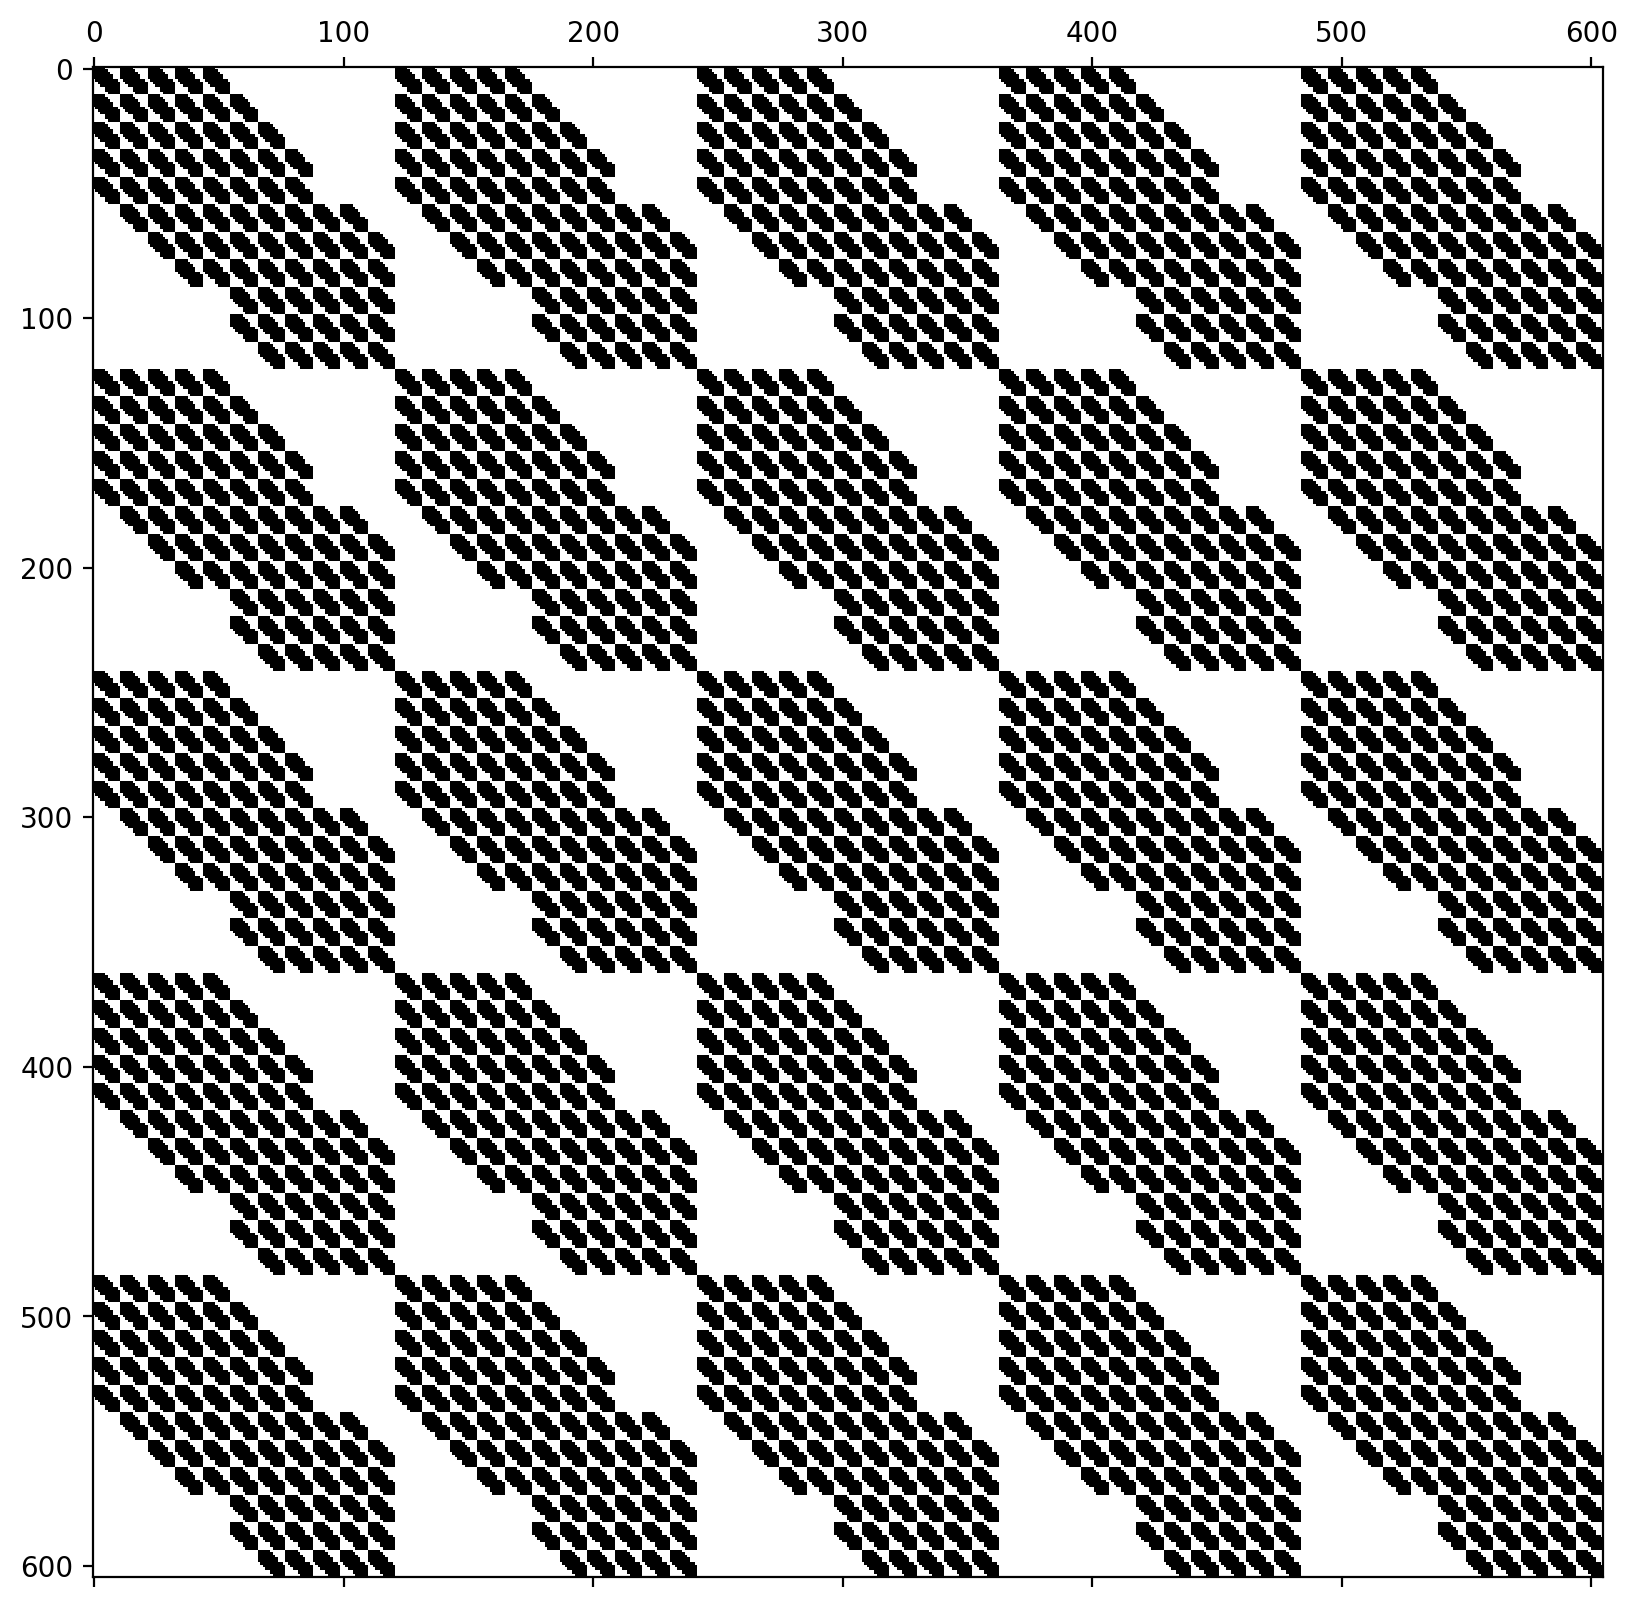

In [3]:
plt.spy(matrix_A)
plt.show()

Macierz $B$ jest fragmentem macierzy wygenerowanym metodą `massmatrix(2, 6, 2, 2)` powielonym $(6, 6)$ krotnie.

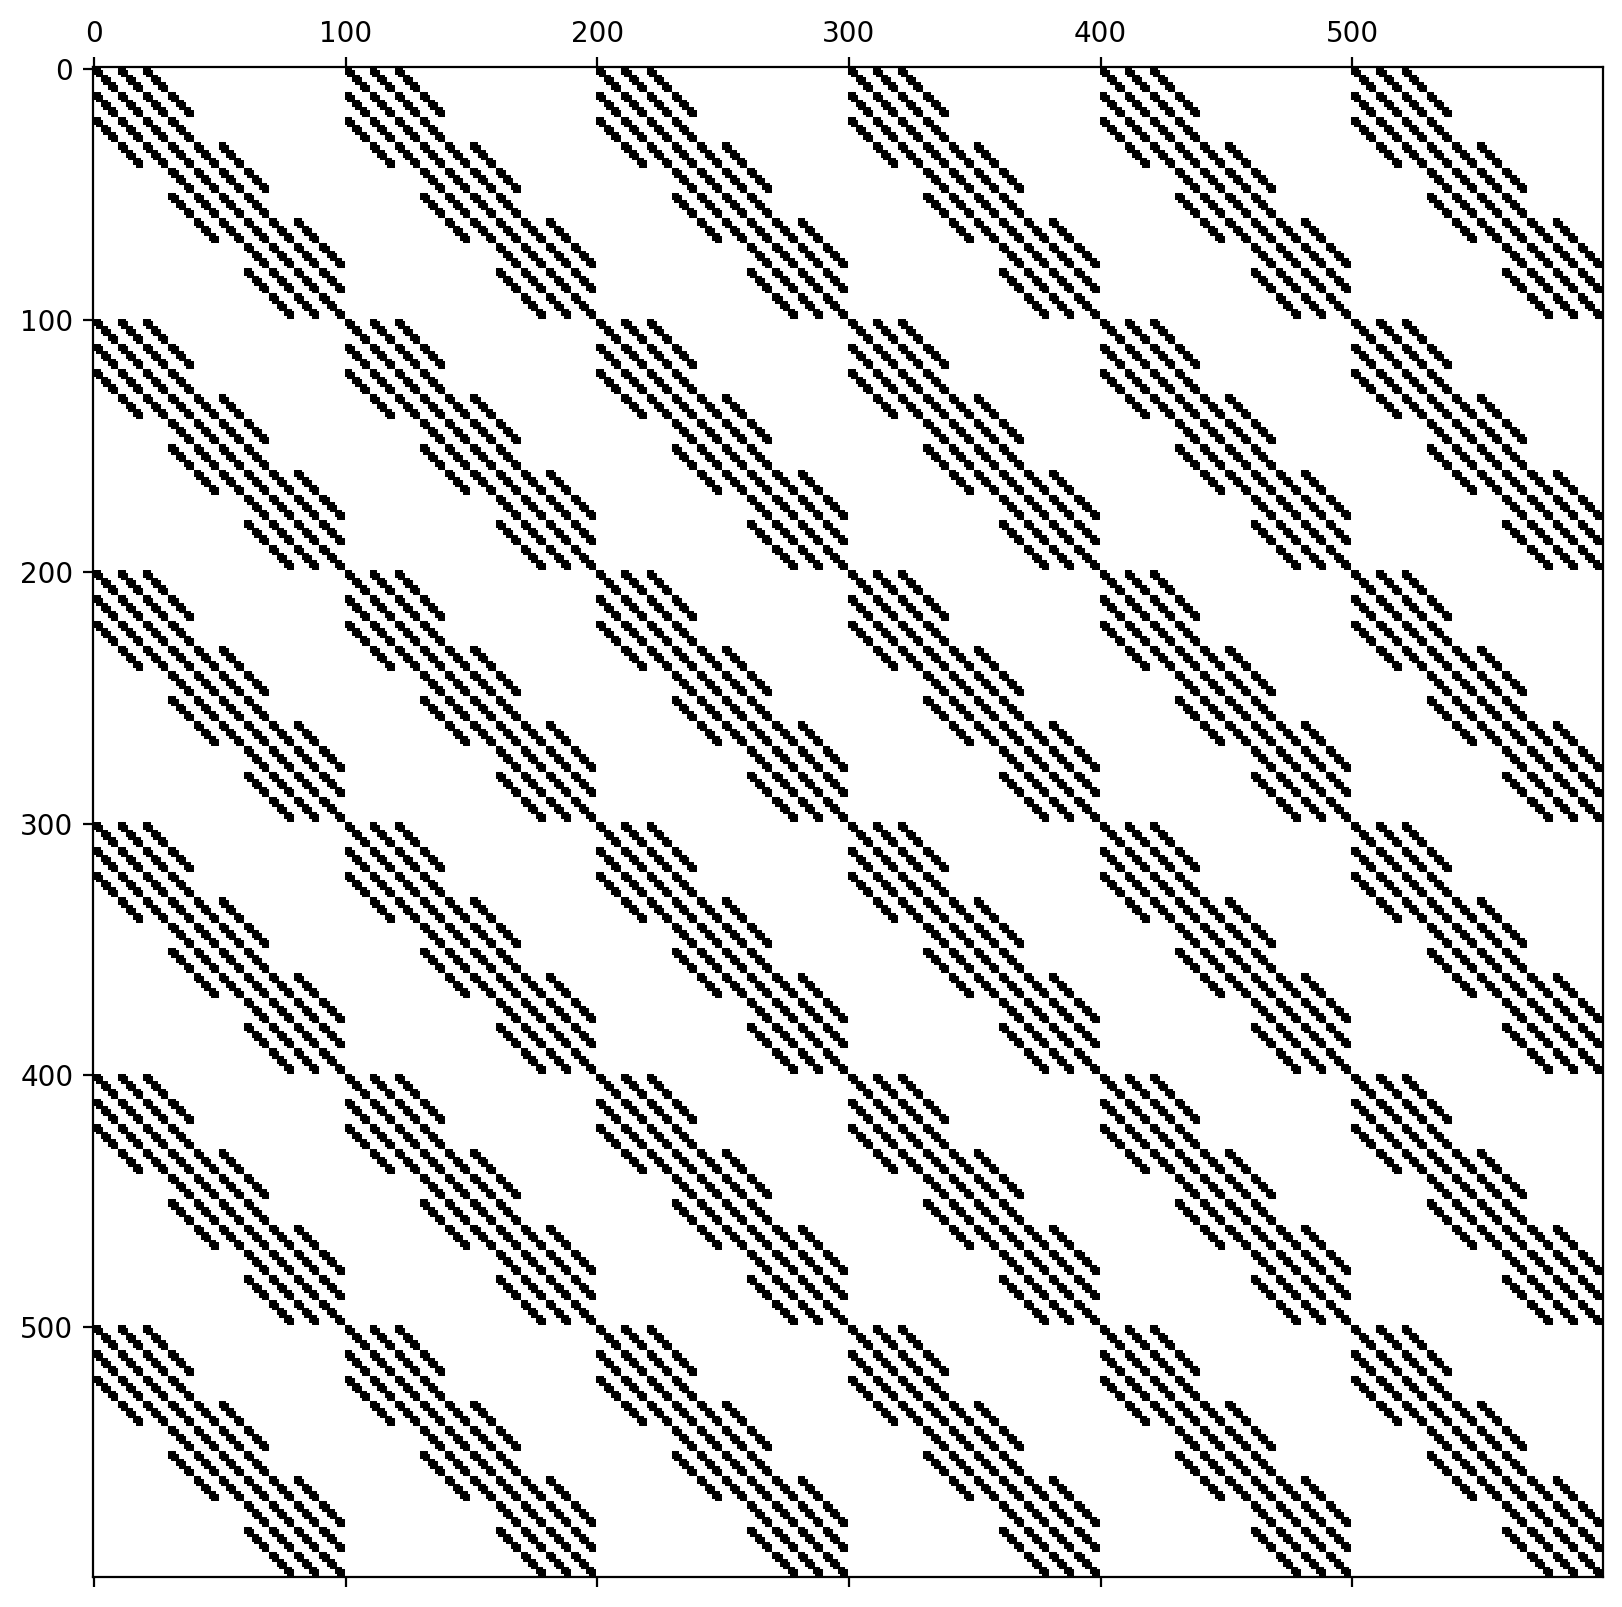

In [4]:
plt.spy(matrix_B)
plt.show()

Macierz $C = A \times B$ jest macierzą gęstą o wszystkich wartościach niezerowych.

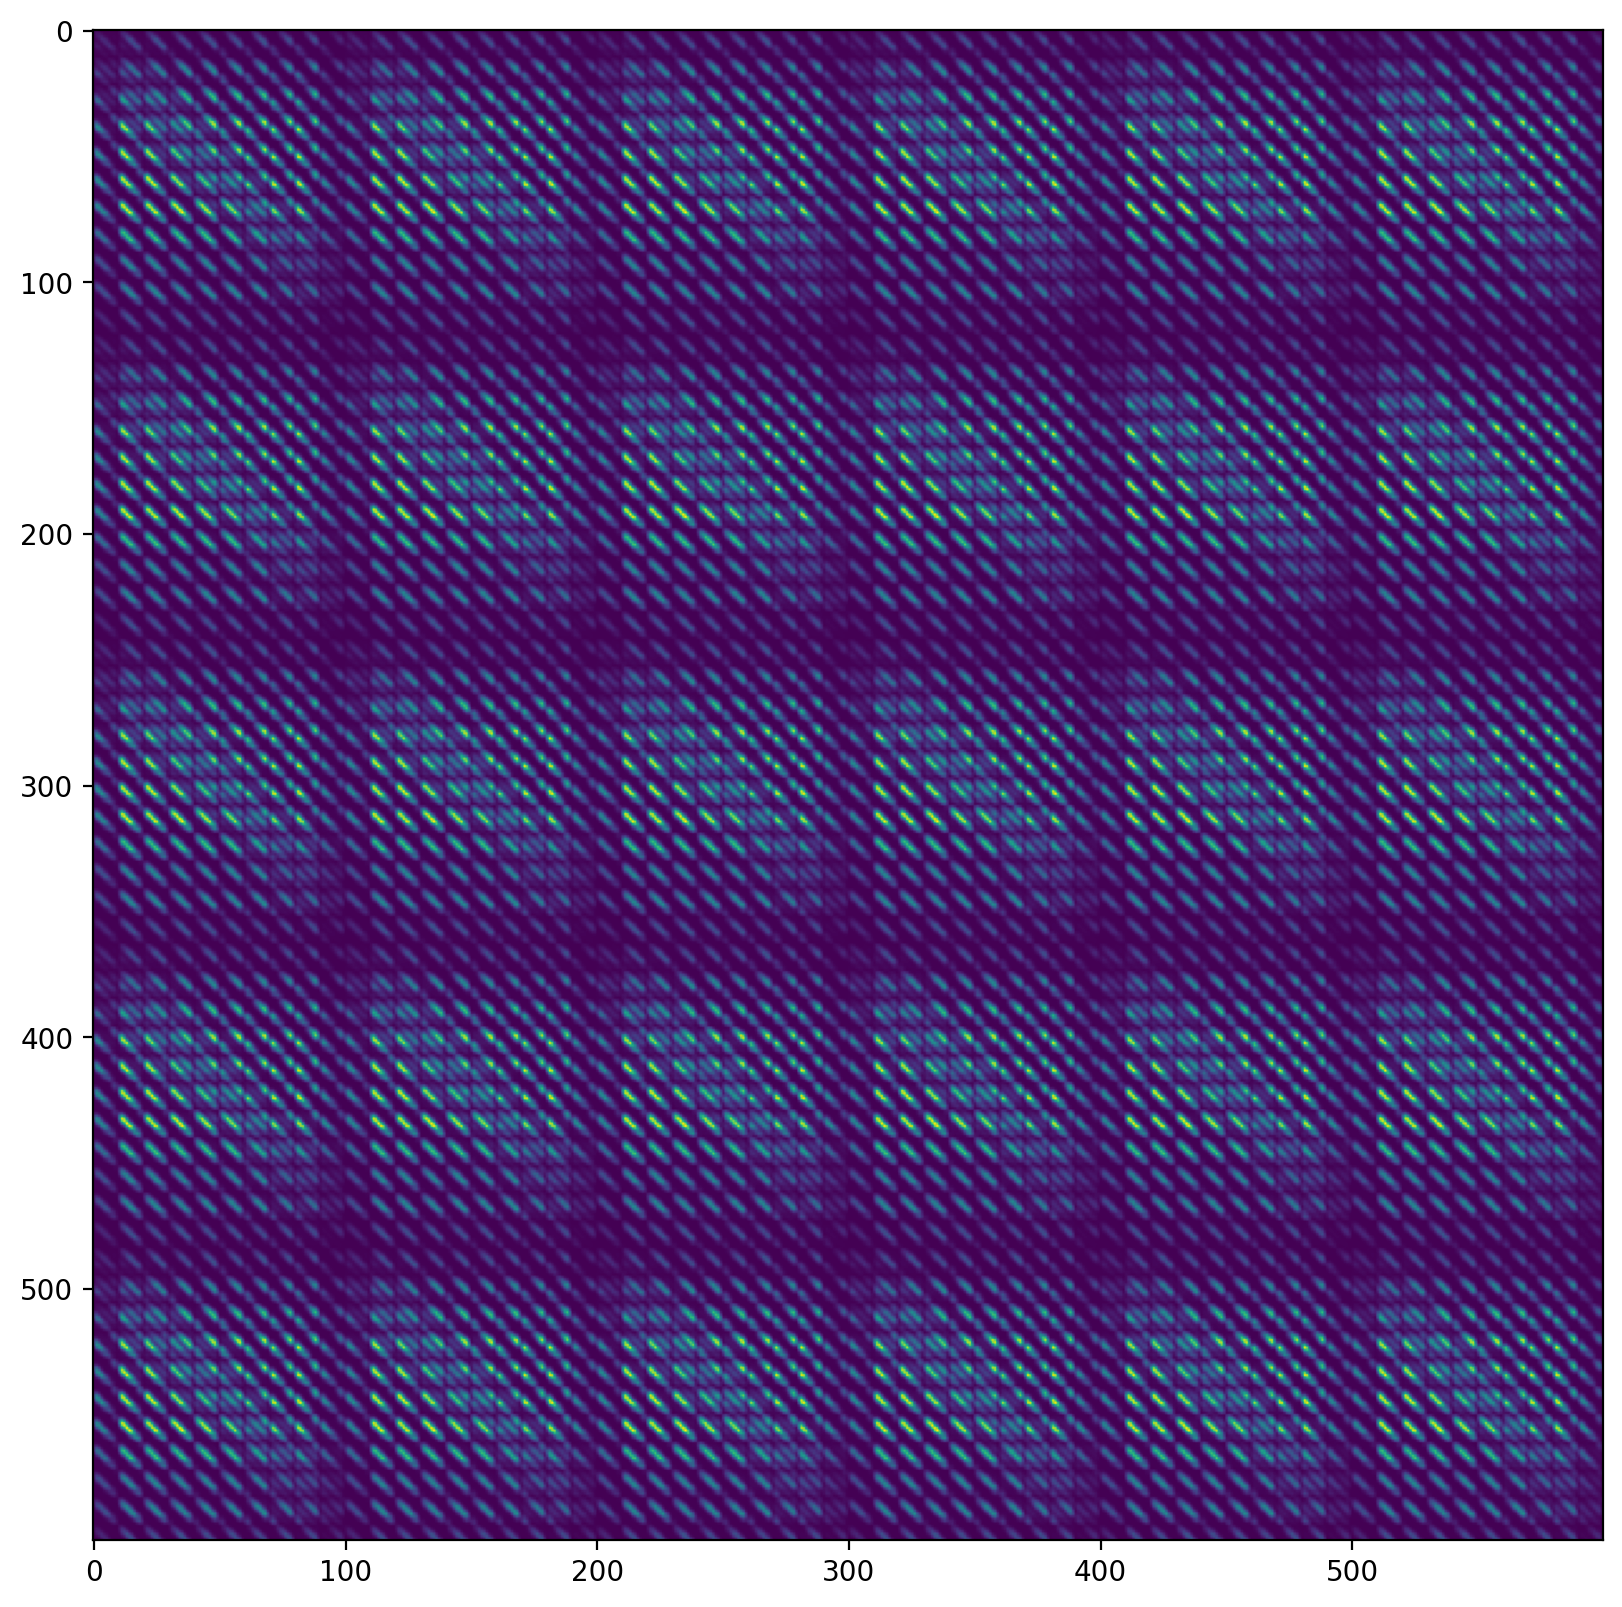

In [5]:
plt.imshow(matrix_A[:max_size, :max_size] @ matrix_B[:max_size, :max_size])
plt.show()

# Ad 3

Pomiary czasów mnożenia macierzy różnych rozmiarów w zależności od podanej permutacji indeksów $i, j, k$:

In [6]:
matrix_sizes = np.arange(100, min(500, max_size) + 1, 50)
permutations = ['ijk', 'ikj', 'jik', 'jki', 'kij', 'kji']
results = {perm: np.zeros(len(matrix_sizes)) for perm in permutations}

for idx, size in enumerate(matrix_sizes):
    A = matrix_A[:size, :size]
    B = matrix_B[:size, :size]
    times = {}
    
    C = np.zeros((size, size))
    start = perf_counter()
    
    for i in range(size):
        for j in range(size):
            for k in range(size):
                C[i][j] += A[i][k] * B[k][j]
    
    results['ijk'][idx] = perf_counter() - start
    C = np.zeros((size, size))
    start = perf_counter()
    
    for i in range(size):
        for k in range(size):
            for j in range(size):
                C[i][j] += A[i][k] * B[k][j]
    
    results['ikj'][idx] = perf_counter() - start
    C = np.zeros((size, size))
    start = perf_counter()
    
    for j in range(size):
        for i in range(size):
            for k in range(size):
                C[i][j] += A[i][k] * B[k][j]
    
    results['jik'][idx] = perf_counter() - start
    C = np.zeros((size, size))
    start = perf_counter()
    
    for j in range(size):
        for k in range(size):
            for i in range(size):
                C[i][j] += A[i][k] * B[k][j]
    
    results['jki'][idx] = perf_counter() - start
    C = np.zeros((size, size))
    start = perf_counter()
    
    for k in range(size):
        for i in range(size):
            for j in range(size):
                C[i][j] += A[i][k] * B[k][j]
    
    results['kij'][idx] = perf_counter() - start
    C = np.zeros((size, size))
    start = perf_counter()
    
    for k in range(size):
        for j in range(size):
            for i in range(size):
                C[i][j] += A[i][k] * B[k][j]
    
    results['kji'][idx] = perf_counter() - start

Wykres zależności czasu mnożenia od kolejności indeksów w pętli:

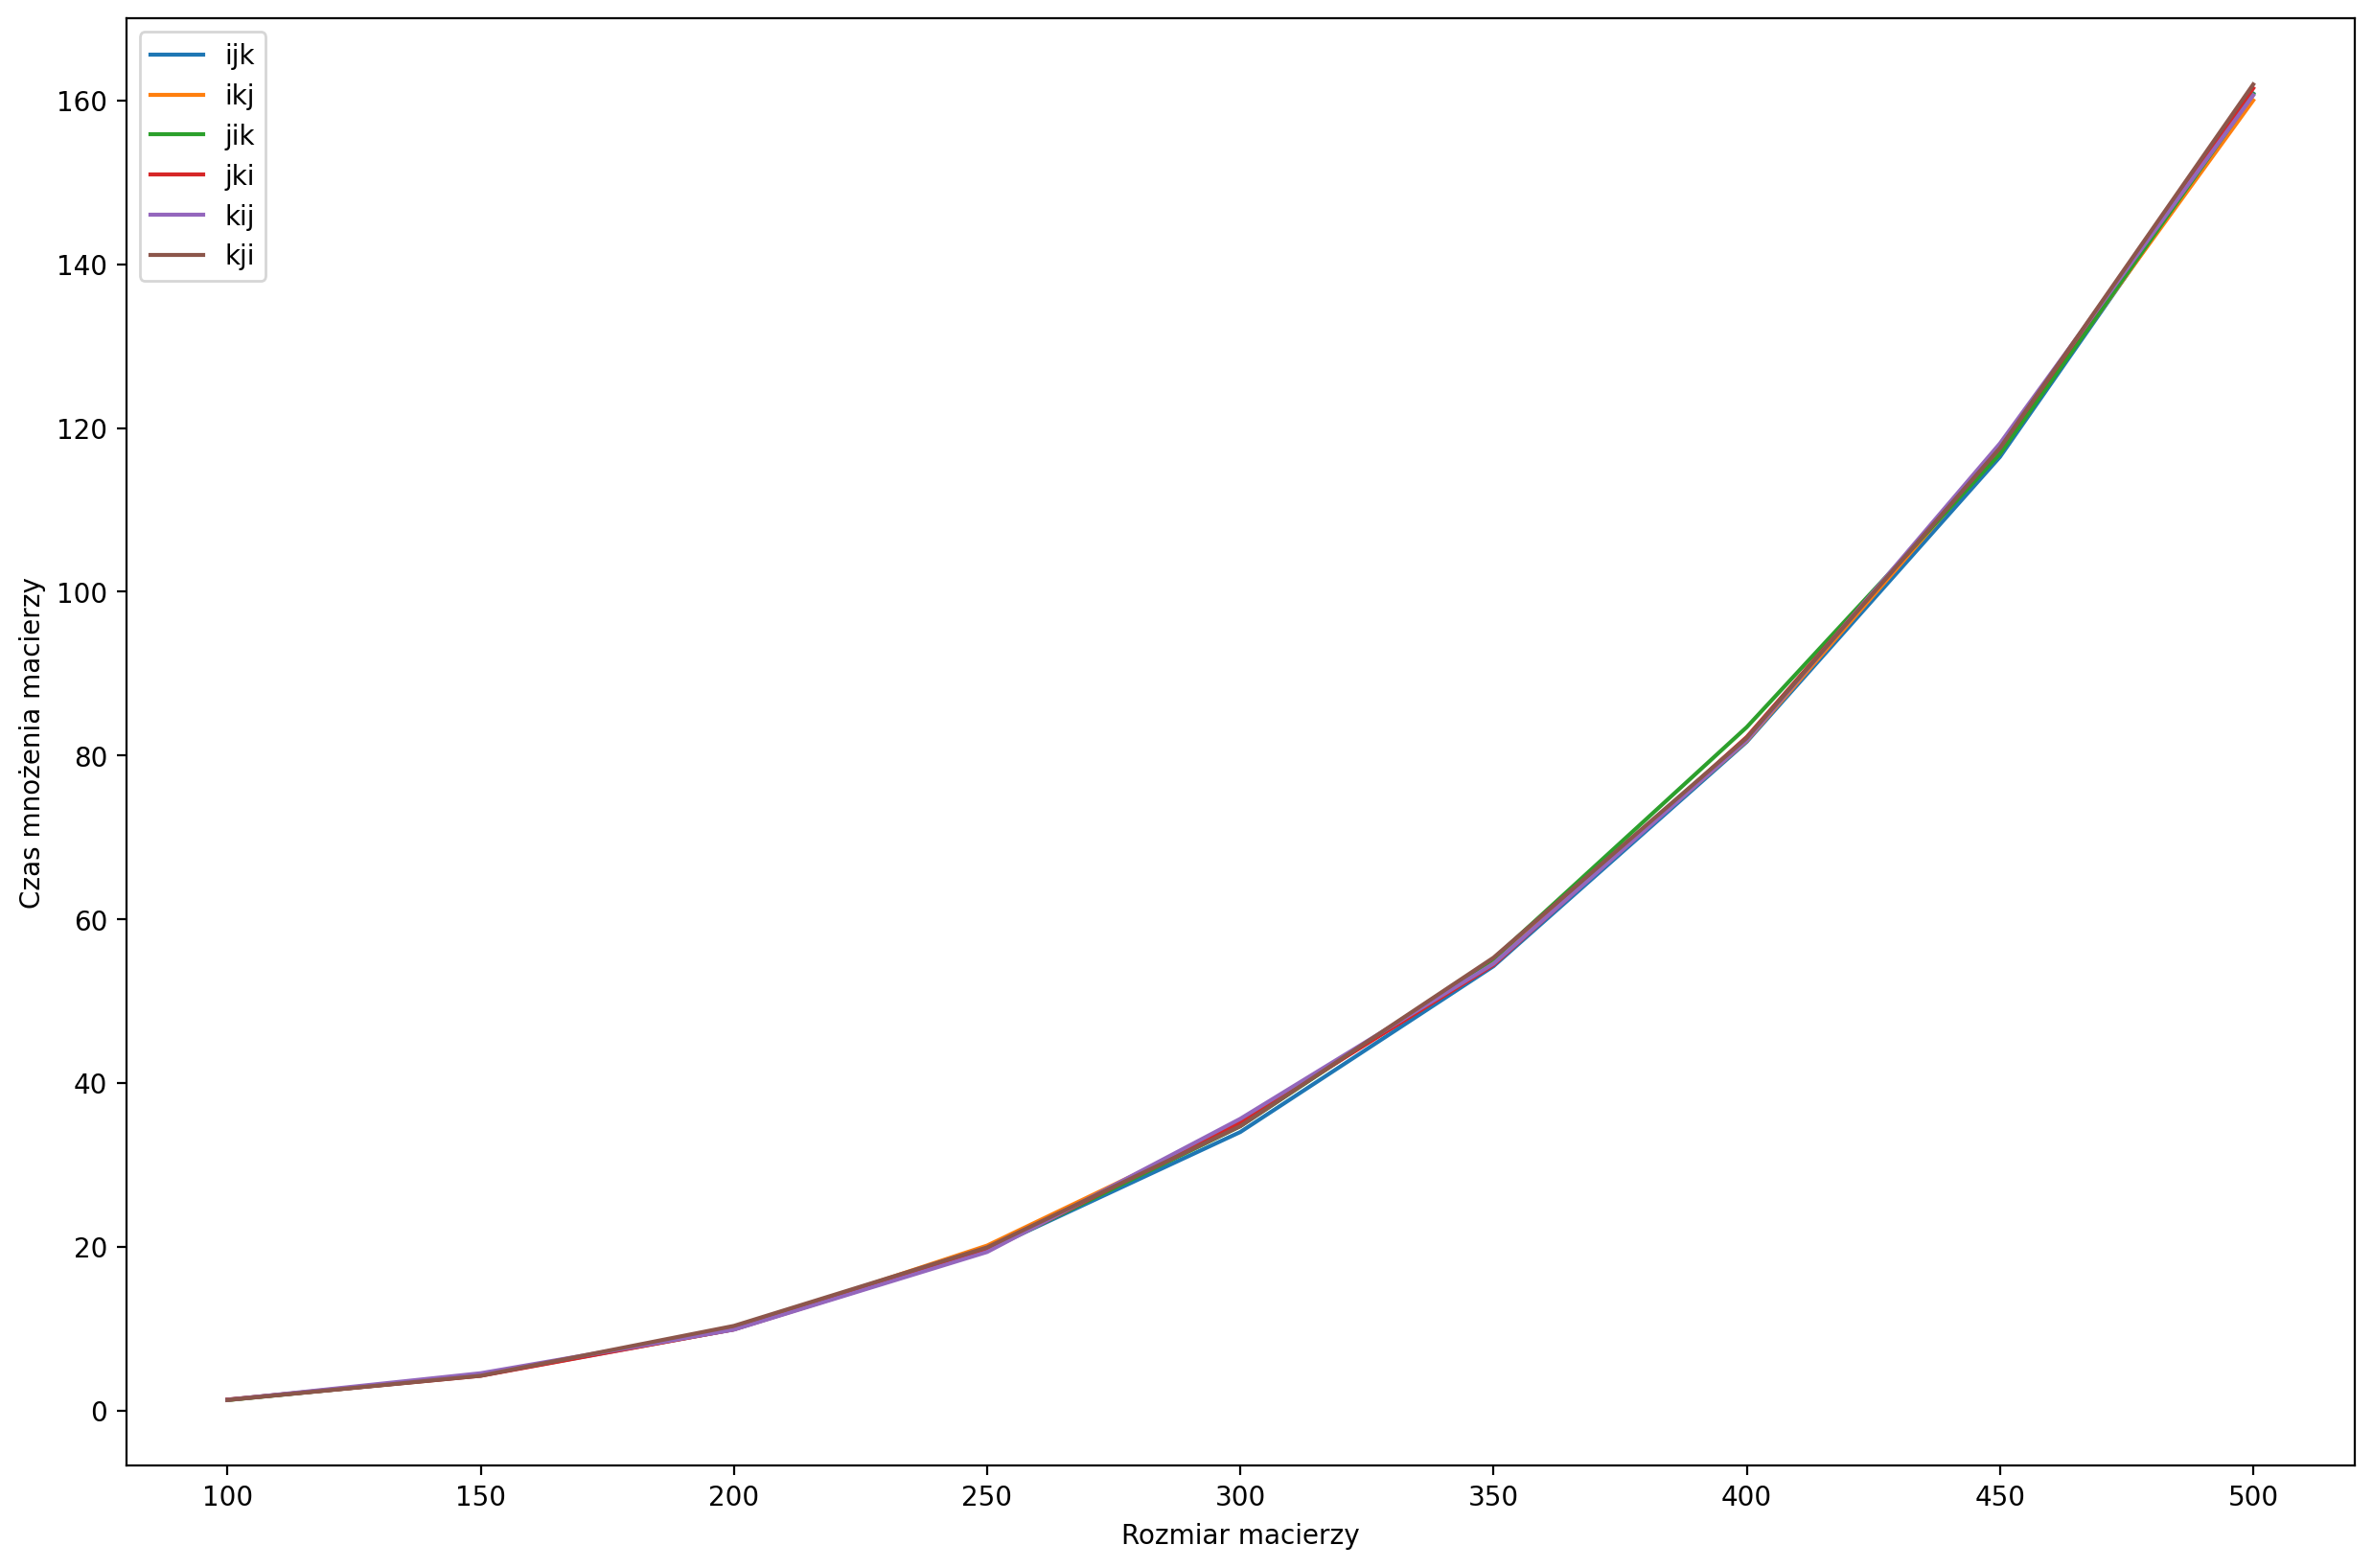

In [7]:
for perm, times in results.items():
    plt.plot(matrix_sizes, times, label=perm)

plt.legend()
plt.ylabel('Czas mnożenia macierzy')
plt.xlabel('Rozmiar macierzy')
plt.show()

Czas mnożenia:

In [8]:
df = pd.DataFrame([[perm, times[-1]] for perm, times in results.items()])
df.columns = 'Kolejność pętli', 'Czas mnożenia [s]'
df

,Kolejność pętli,Czas mnożenia [s]
0,ijk,160.854943
1,ikj,160.023244
2,jik,160.773257
3,jki,161.493827
4,kij,160.639028
5,kji,161.968151


Wyniki pomiarów pokazują, że kolejność wystepowania $i$ , $j$ , $k$ w pętli nie wpłynął znacząco na czas operacji mnożenia
macierzy. Spodziewaliśmy się najwyższej wydajnośći dla permutacji indeksów: $ijk$. Nasze oczekiwania wynikają z 
hierarchiczności pamięci komputera (RAM, cache L3, L2, L1) oraz wierszowego zapisu macierzy w pamięci - indeksy $k$ i $j$ są najczęściej "zmieniane", zatem odpowiadające im wiersze macierzy $A$ i $B$ mogą zostać 
załadowane do szybkiej pamięci podręcznej procesora i wykorzystywane podczas algorytmu mnożenia. Otrzymane rezultaty
mogą wynikać z wysokopoziomowości języka Python, w którym zostało zaimplementowane mnożenie.

Liczba operacji zmiennoprzecinkowych na sekundę prezentuje się następująco:

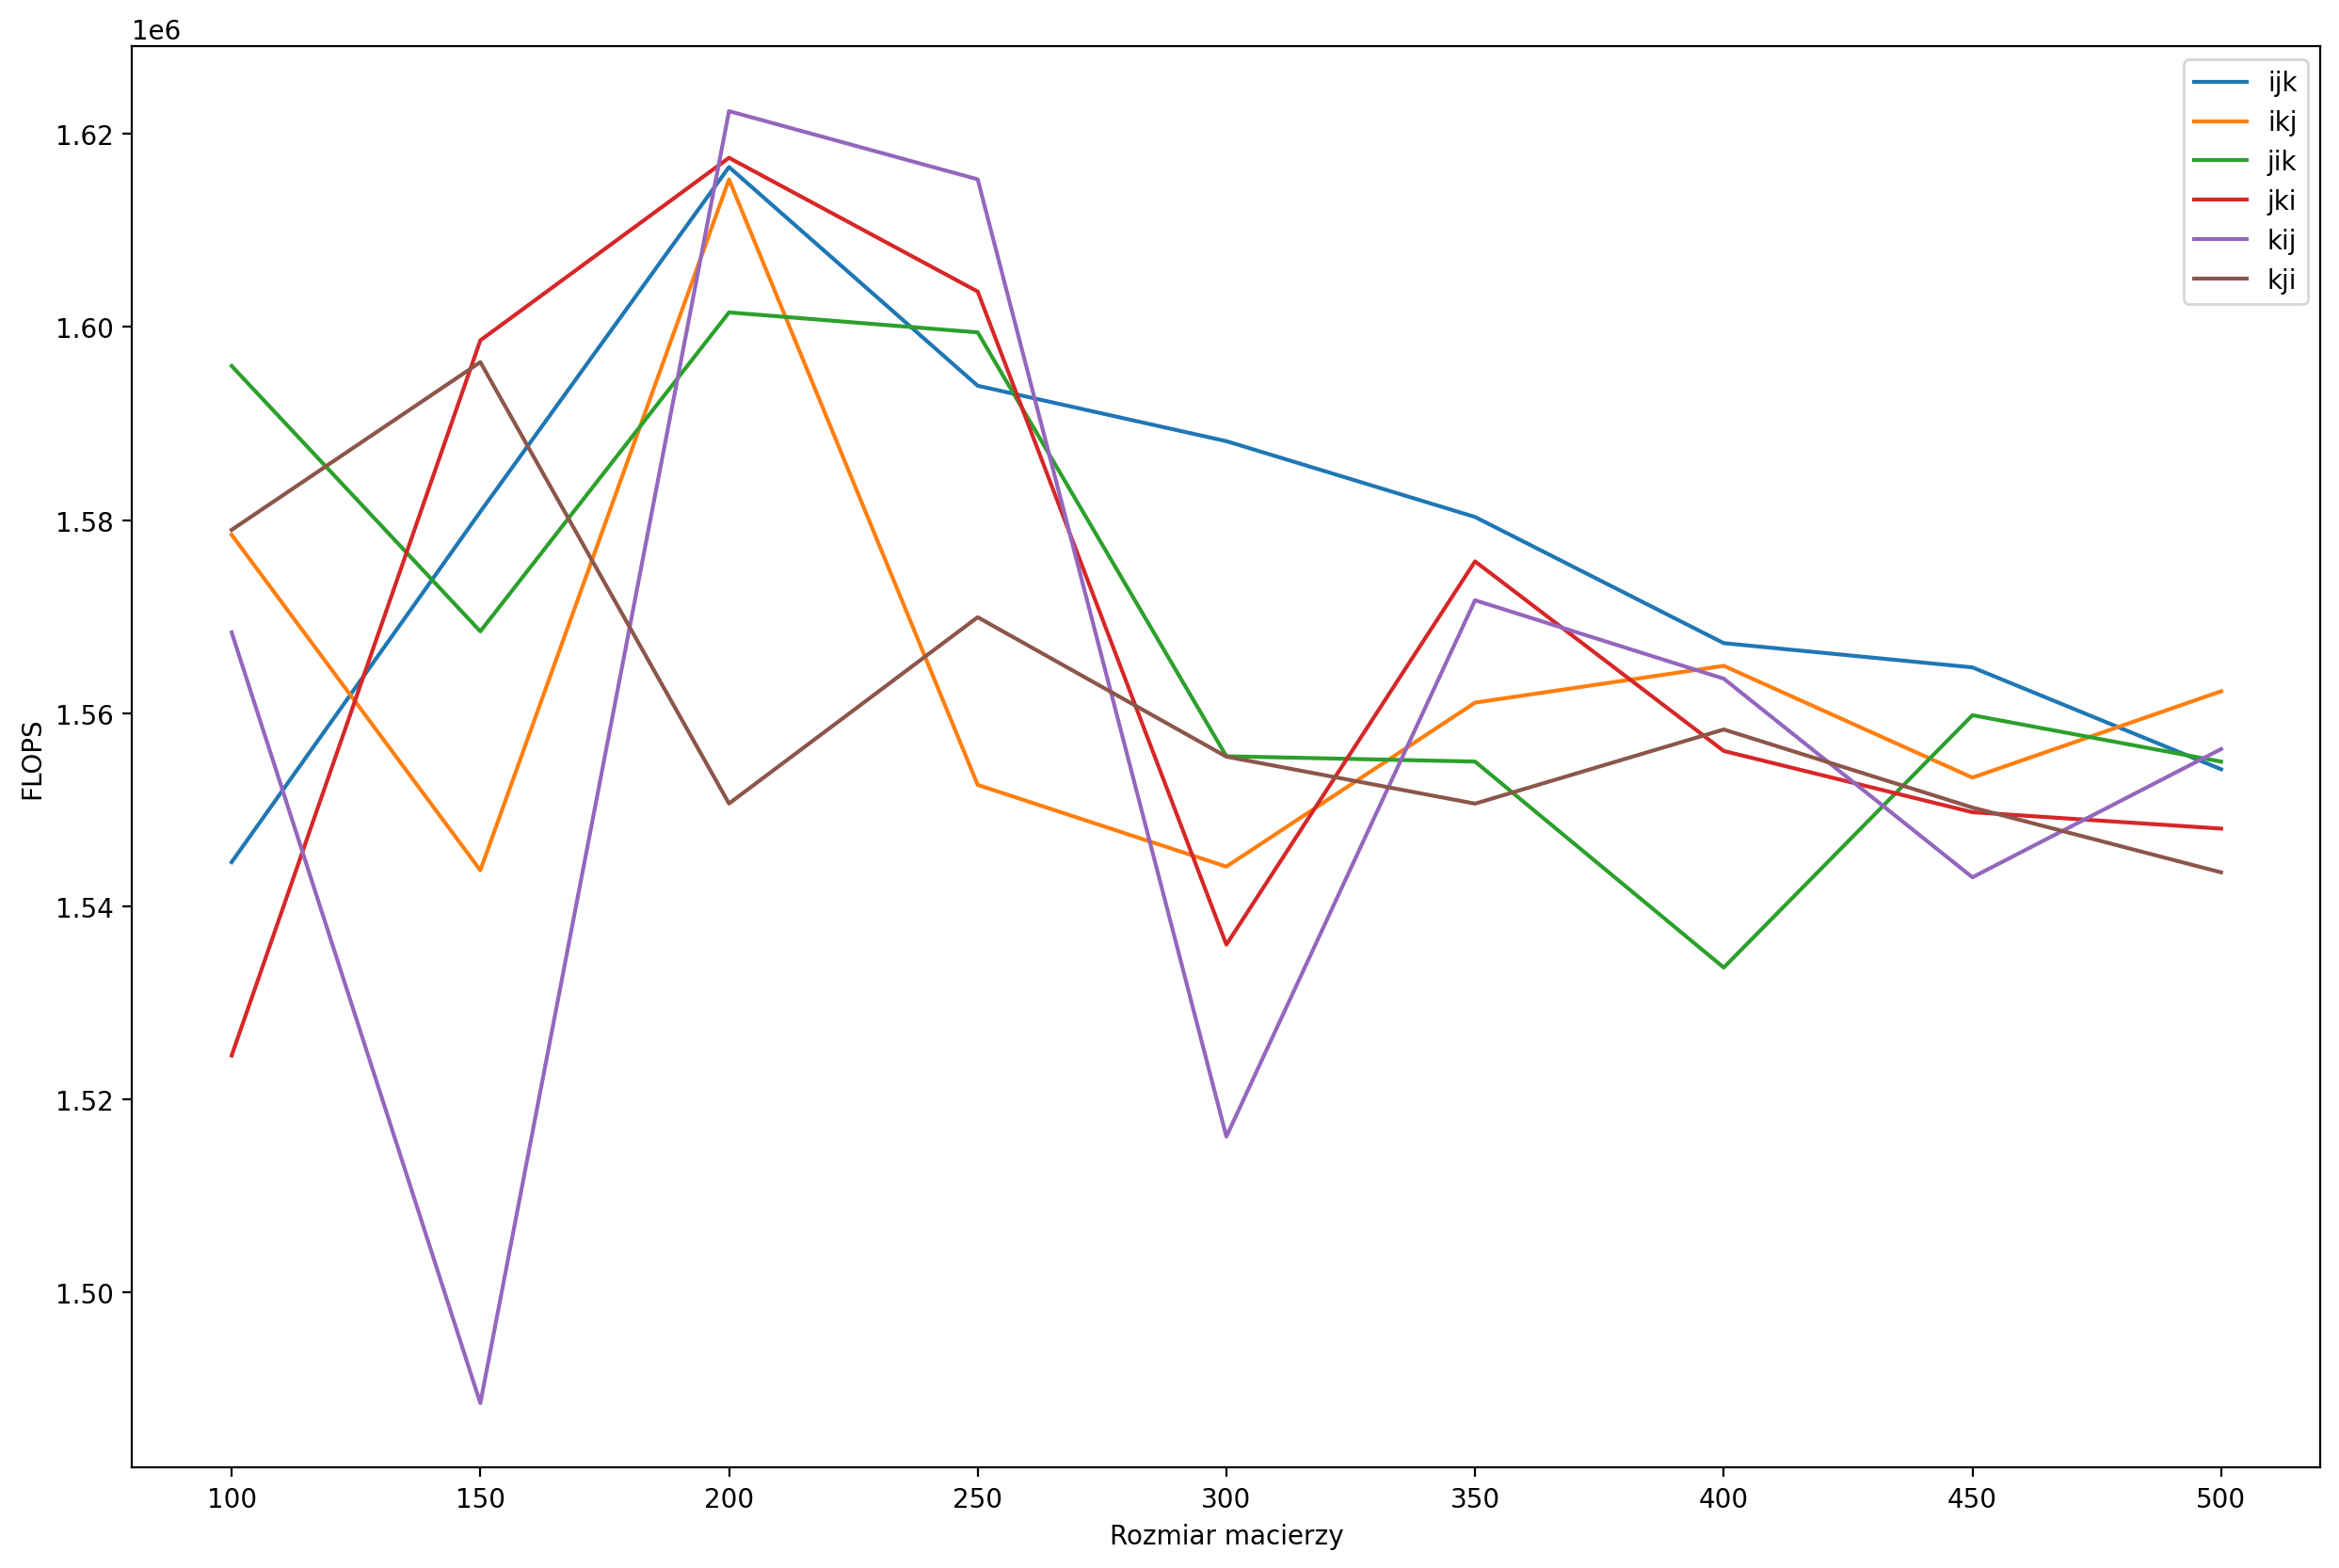

In [9]:
operations = 2 * matrix_sizes ** 3

for perm, times in results.items():
    plt.plot(matrix_sizes, operations / times, label=perm)

plt.legend()
plt.ylabel('FLOPS')
plt.xlabel('Rozmiar macierzy')
plt.show()

# Ad 4

Do mnożenia blokowego macierzy przyjęliśmy, że podziały bloków są zawsze takie same, ponieważ bierzemy pod uwagę tylko macierze kwadratowe.

In [10]:
def mul_ijk(A, B, C, size):
    for i in range(size):
        for j in range(size):
            for k in range(size):
                C[i][j] += A[i][k] * B[k][j]

In [11]:
def block_mul(A, B, block_lengths, size):
    A = matrix_A[:size, :size]
    B = matrix_B[:size, :size] 
    times = []    
    
    for block in block_lengths:
        C = np.zeros((size, size))   
        start = perf_counter()
        
        for i in range(0, size, block):
            for j in range(0, size, block):
                for k in range(0, size, block):
                    A_slice = A[i:i+block, k:k+block]
                    B_slice = B[k:k+block, j:j+block]
                    C_slice = C[i:i+block, j:j+block]
                    mul_ijk(A_slice, B_slice, C_slice, block)
                    
        time = perf_counter() - start
        times.append(time)
 
    return times

In [12]:
def show_table(block_lengths, times):
    df = pd.DataFrame([[length, time] for length, time in zip(block_lengths, times)])
    df.columns = 'Rozmiar bloku', 'Czas mnożenia [s]'
    return df

## Czas mnożenia dla macierzy kwadratowej 400x400:

In [13]:
block_lengths = [2, 5, 10, 20, 40, 50, 100, 200]
time = block_mul(matrix_A, matrix_B, block_lengths, 400)

In [14]:
show_table(block_lengths, time)

,Rozmiar bloku,Czas mnożenia [s]
0,2,99.467951
1,5,79.837049
2,10,76.900393
3,20,75.201613
4,40,74.298870
5,50,73.645748
6,100,73.326341
7,200,74.214230


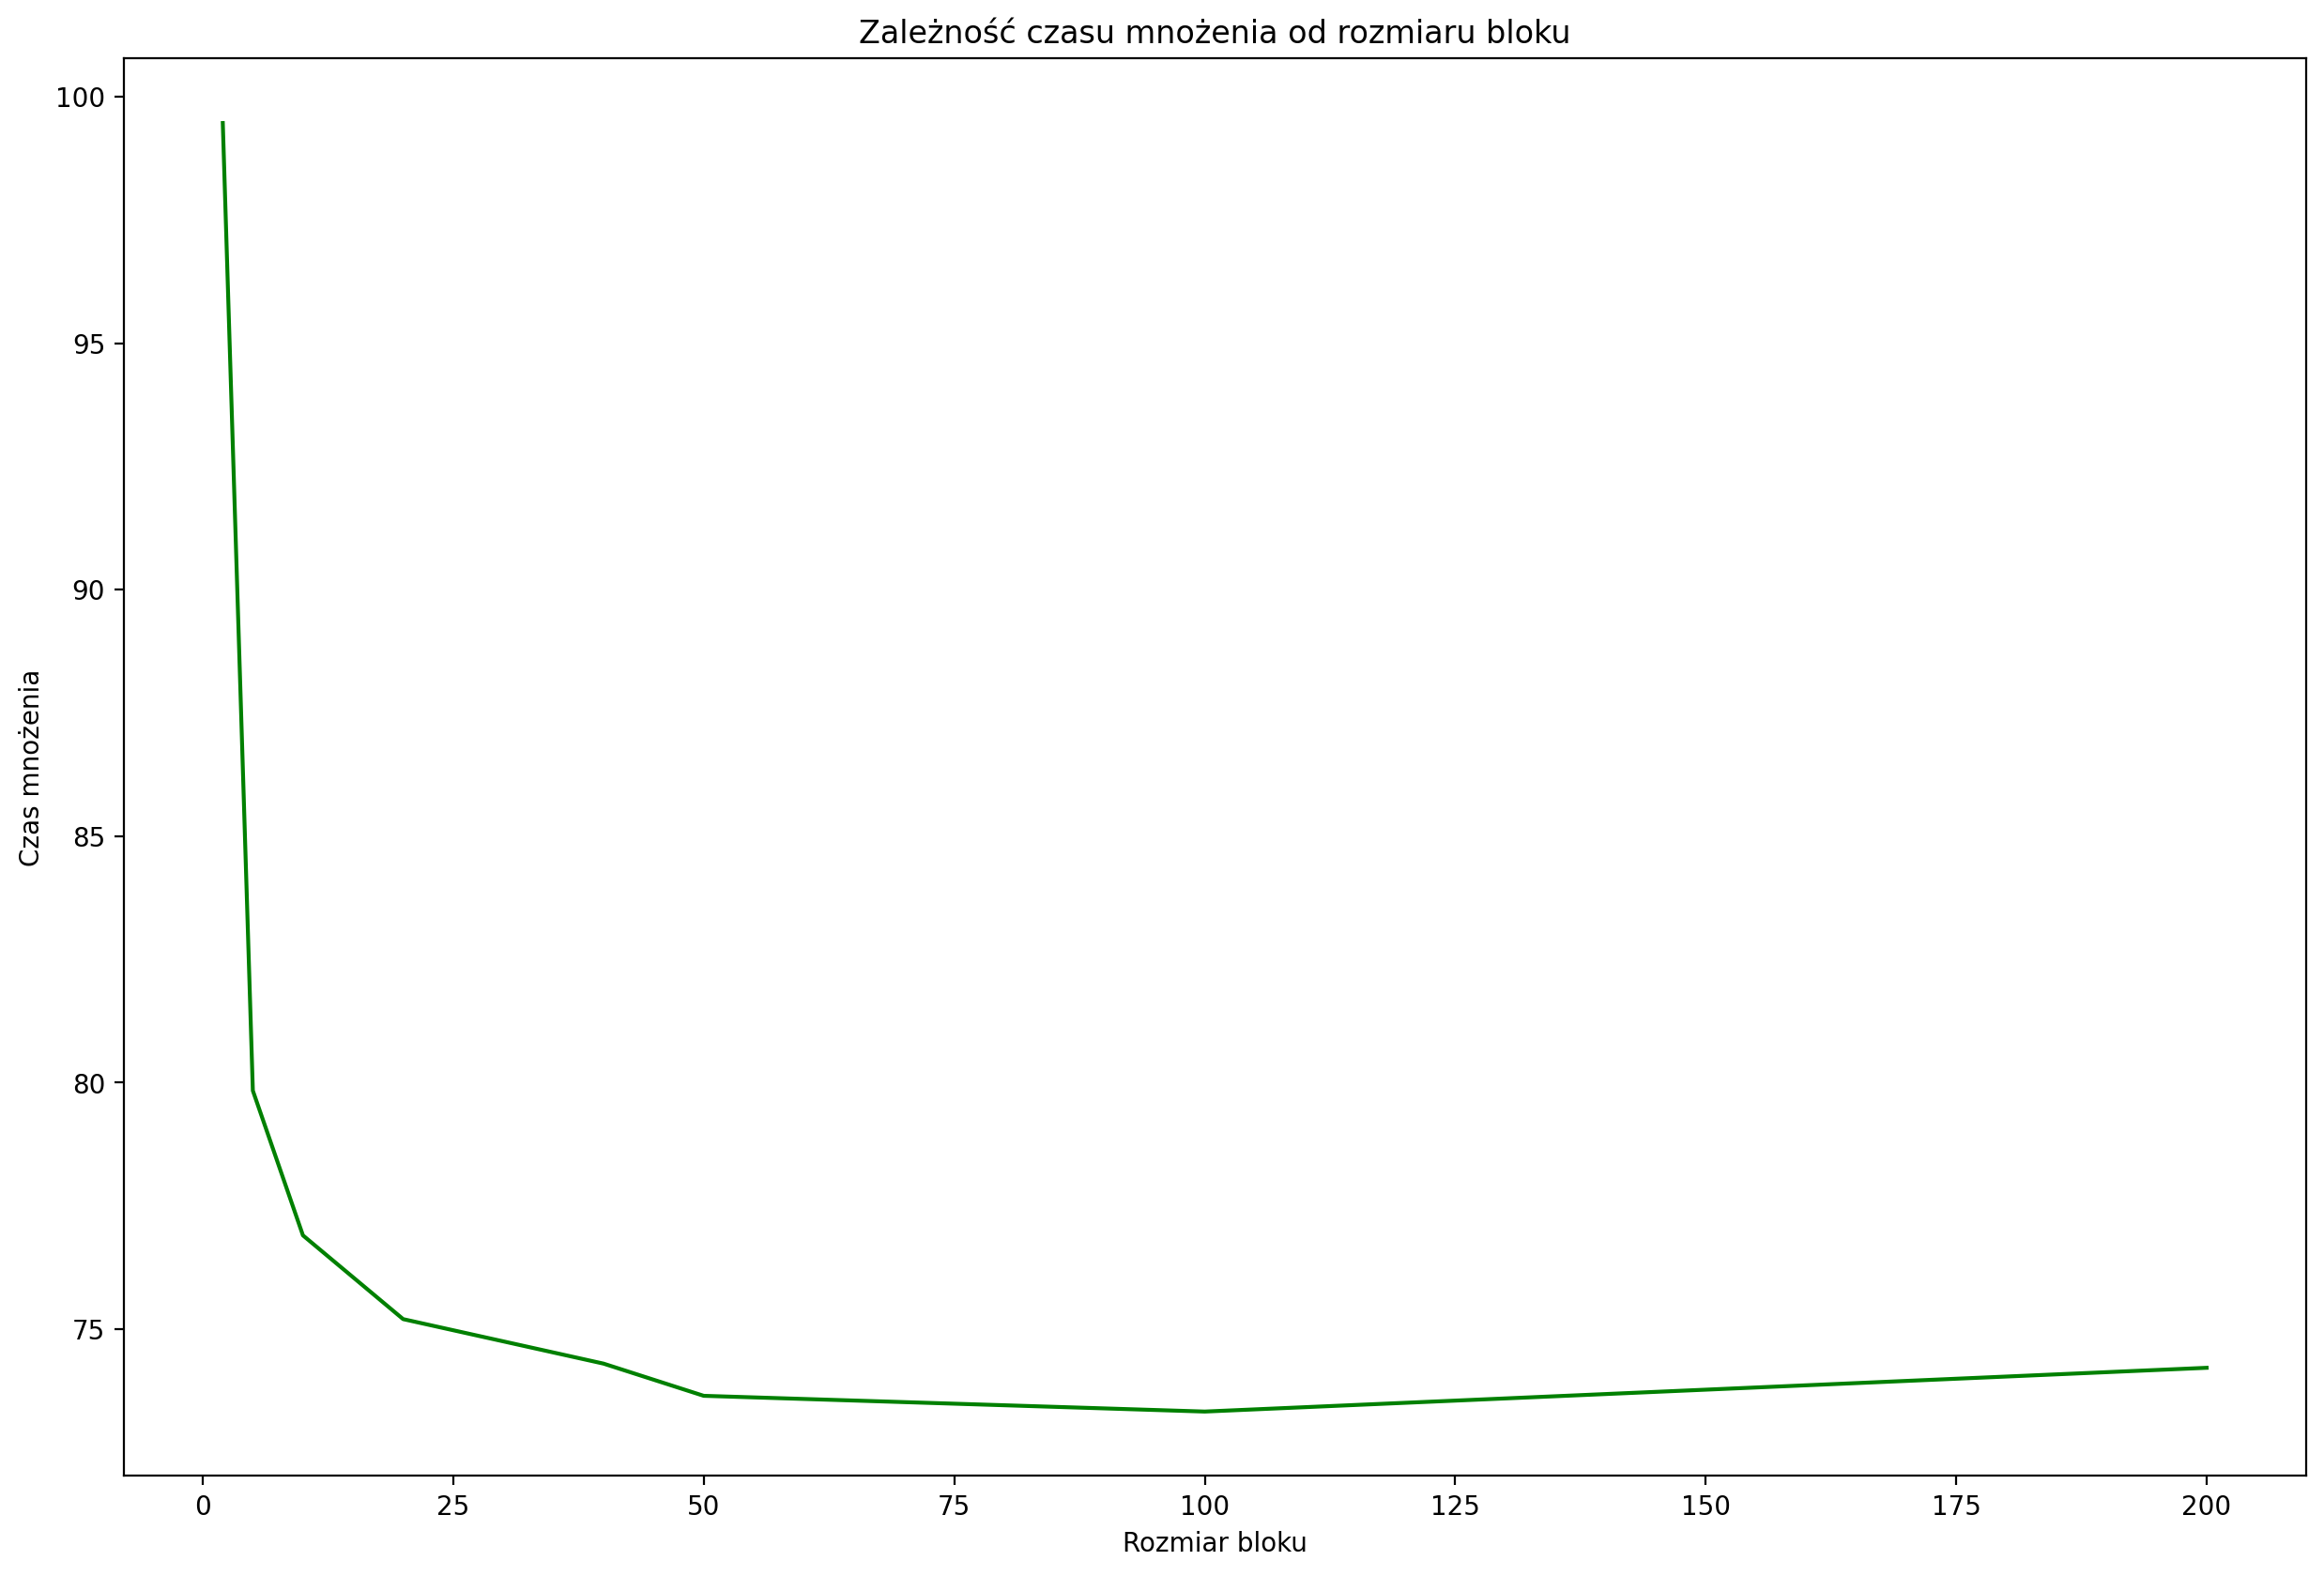

In [15]:
plt.plot(block_lengths, time, color = 'green')
plt.xlabel("Rozmiar bloku")
plt.ylabel("Czas mnożenia")
plt.title("Zależność czasu mnożenia od rozmiaru bloku")
plt.show()

## Czas mnożenia dla macierzy kwadratowej 500x500

In [16]:
block_lengths2 = [2, 5, 10, 20, 50, 100, 250]
time2 = block_mul(matrix_A, matrix_B, block_lengths2, 500)

In [17]:
show_table(block_lengths2, time2)

,Rozmiar bloku,Czas mnożenia [s]
0,2,184.954766
1,5,146.390551
2,10,141.326789
3,20,137.742368
4,50,137.406338
5,100,138.190835
6,250,137.350386


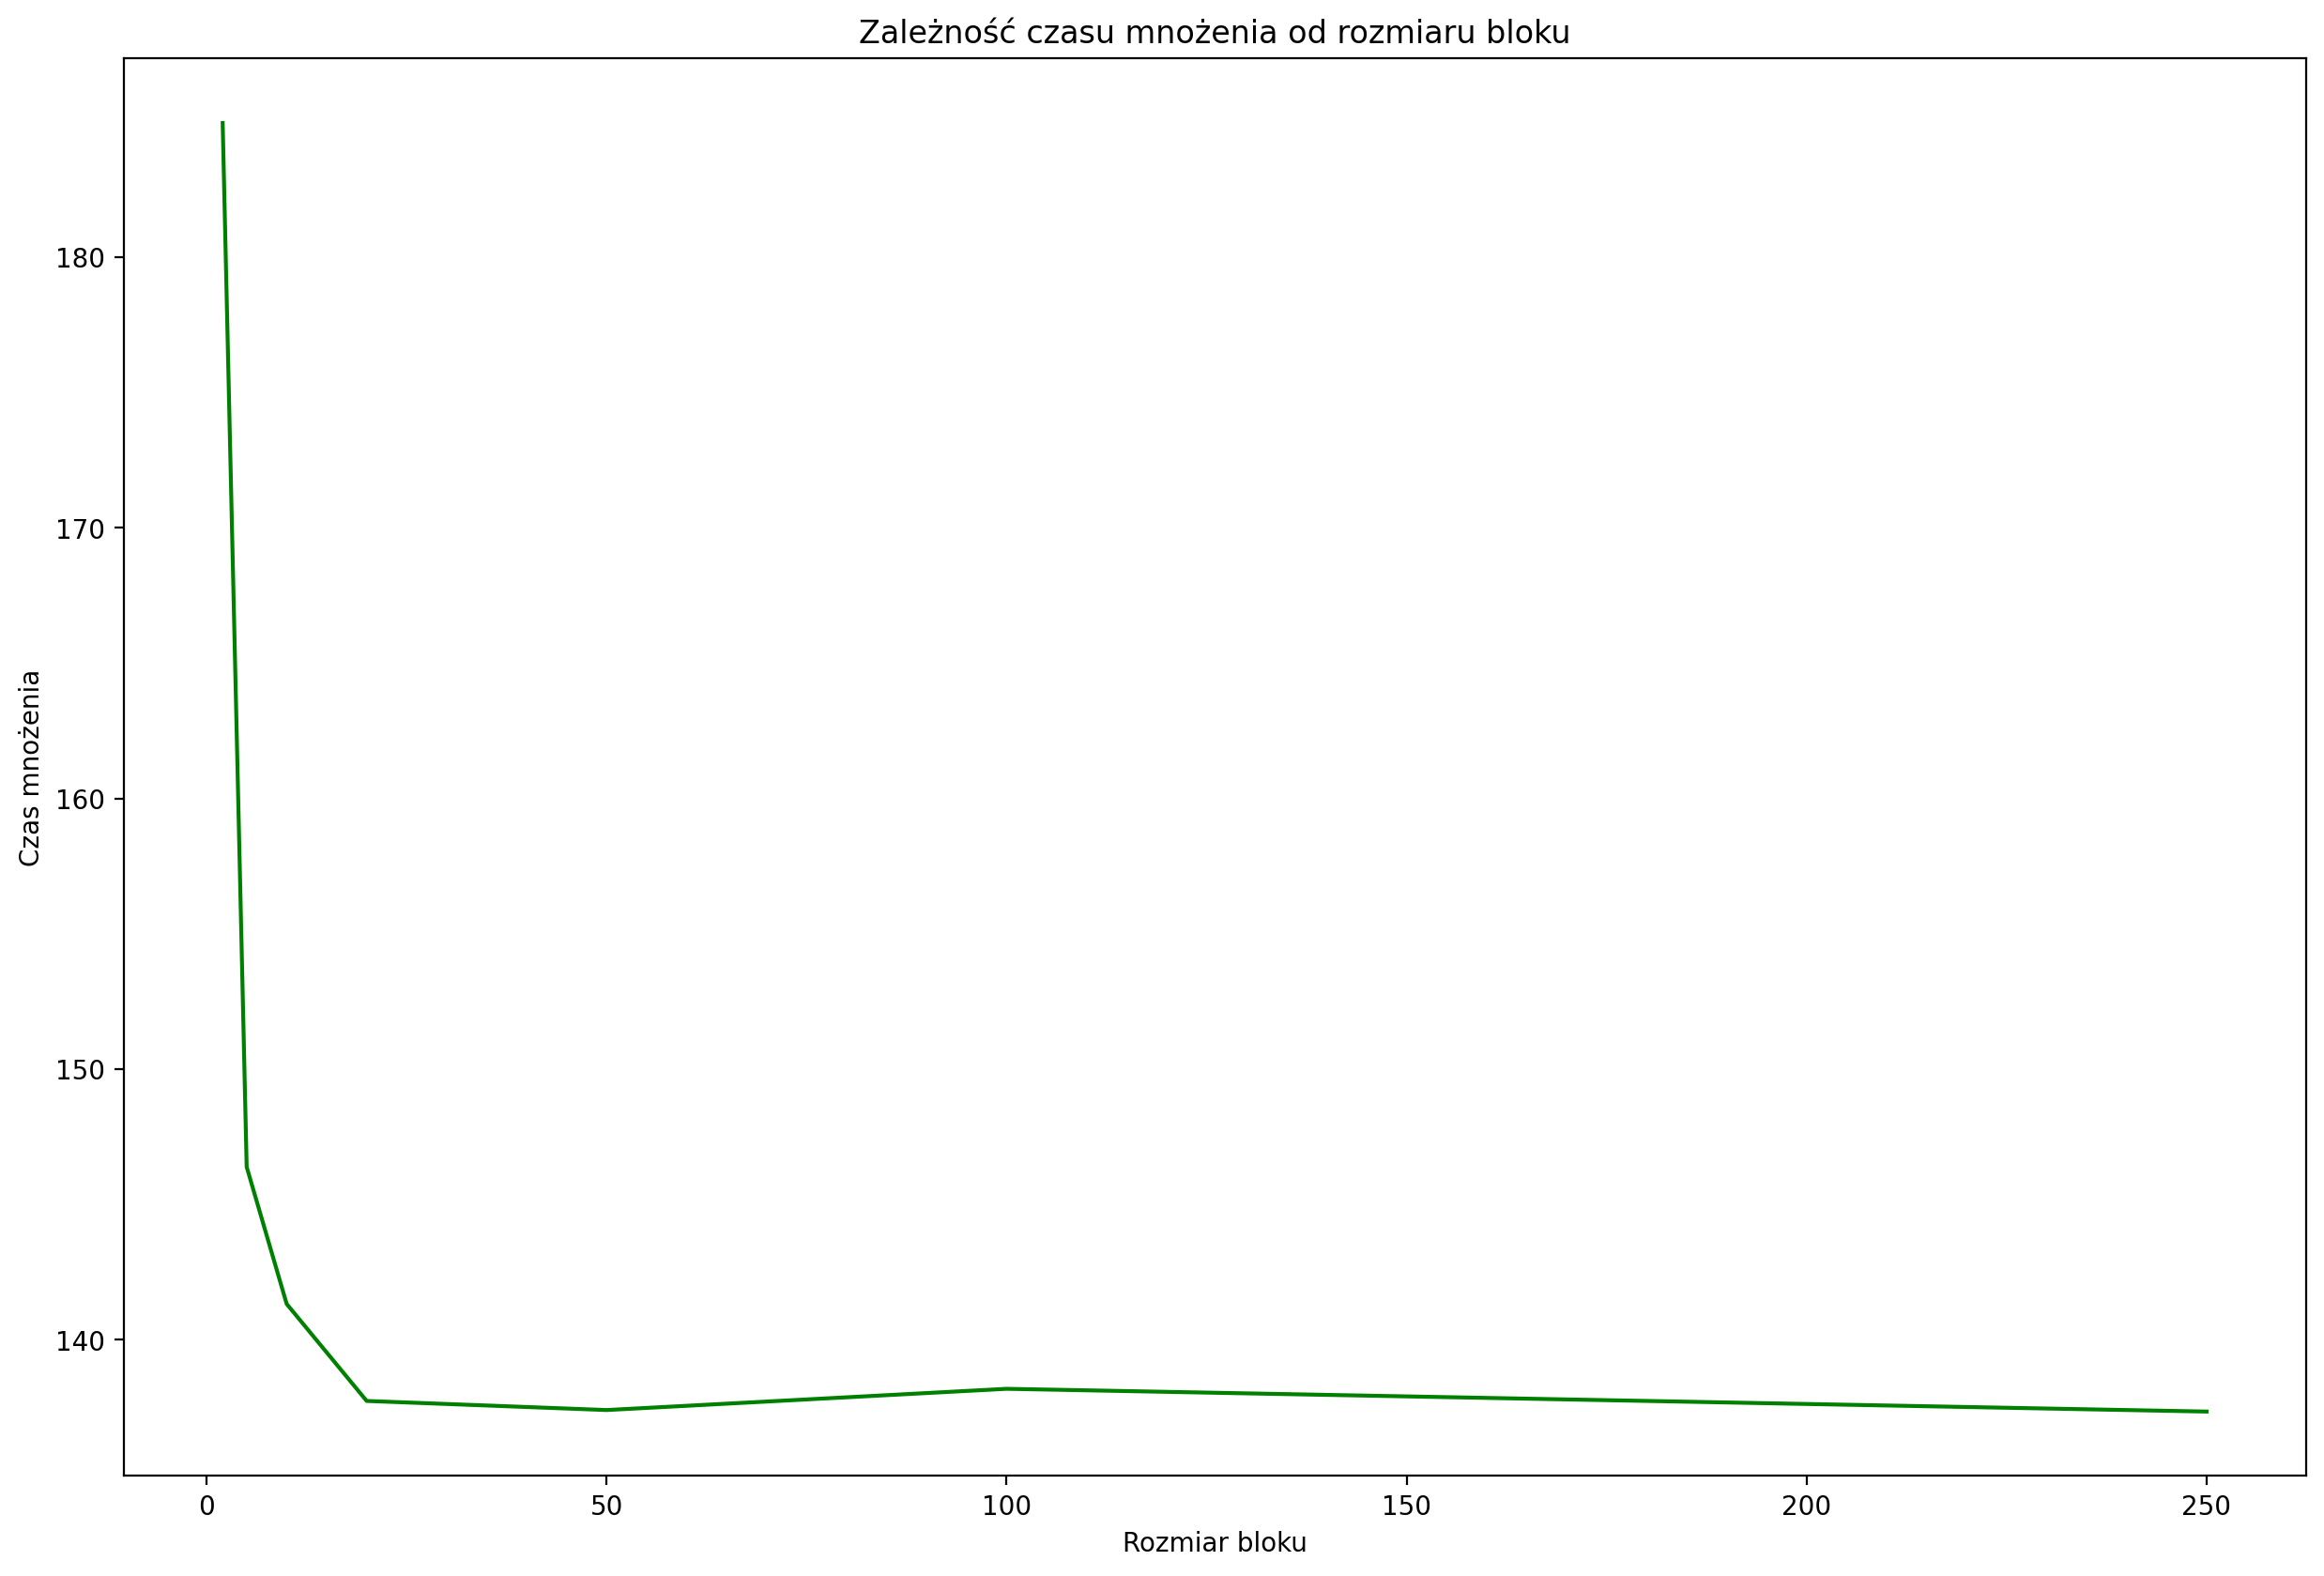

In [18]:
plt.plot(block_lengths2, time2, color = 'green')
plt.xlabel("Rozmiar bloku")
plt.ylabel("Czas mnożenia")
plt.title("Zależność czasu mnożenia od rozmiaru bloku")
plt.show()

Dla małych rozmiarów bloków czas wykonania jest znacznie dłuższy niż dla większych rozmiarów, ponieważ obliczenia związane z
częstym podziałem macierzy wydłużyły czas działania algorytmu. Optymalna wielkość bloku dla ręcznie napisanego mnożenia `mul_ijk` i wybranych macierzy wynosi około 50.

Stosowanie mnożenia blokowego wpłynęło nieznacznie na czas mnożenia macierzy, chociaż spodziewaliśmy się znaczącej poprawy. Może to wynikać z wysokopoziomowości języka Python.

# Ad 5

Liczba operacji zmiennoprzecinkowych w klasycznym algorytmie mnożenia macierzy gęstych wynosi 
$2 \cdot m \cdot n \cdot l$ , gdzie $m$ , $n$ , $l$ to rozmiary mnożonych macierzy.
Dla macierzy kwadratowych liczba operacji zmiennoprzecinkowych wynosi $2n^3$.
W przypadku naszych macierzy $500 \times 500$, liczba operacji wynosi $2 \cdot 500 \cdot 500 \cdot 500 = 250000000$.

# Dodatkowe sprawdzenie - mnożenie wbudowane

**Mnożenie blokowe z użyciem wbudowanego mnożenia.**

Do testów z użyciem wbudowanego mnożenia wykorzystaliśmy znacznie większe macierze uzyskane przez zwielokrotnienie wcześniej wczytanych macierzy.

In [19]:
def block_mul_np(A, B, block_lengths, size):
    times = []    

    for block in block_lengths:
        C = np.zeros((size, size))
        start = perf_counter()
        
        for i in range(0, size, block):
            for j in range(0, size, block):
                for k in range(0, size, block):
                    A_slice = A[i:i+block, k:k+block]
                    B_slice = B[k:k+block, j:j+block]
                    C[i:i+block, j:j+block] += A_slice @ B_slice
                    
        time = perf_counter() - start
        times.append(time)
 
    return times

In [20]:
big_size = 10000
big_A = np.tile(matrix_A, (20, 20))[:big_size, :big_size]
big_B = np.tile(matrix_B, (20, 20))[:big_size, :big_size]

In [21]:
block_lengths3 = [100, 500, 1000, 2000, 5000, 10000]
time3 = block_mul_np(big_A, big_B, block_lengths3, big_size)

In [22]:
show_table(block_lengths3, time3)

,Rozmiar bloku,Czas mnożenia [s]
0,100,179.443008
1,500,33.872339
2,1000,26.847637
3,2000,23.196569
4,5000,22.132321
5,10000,24.694226


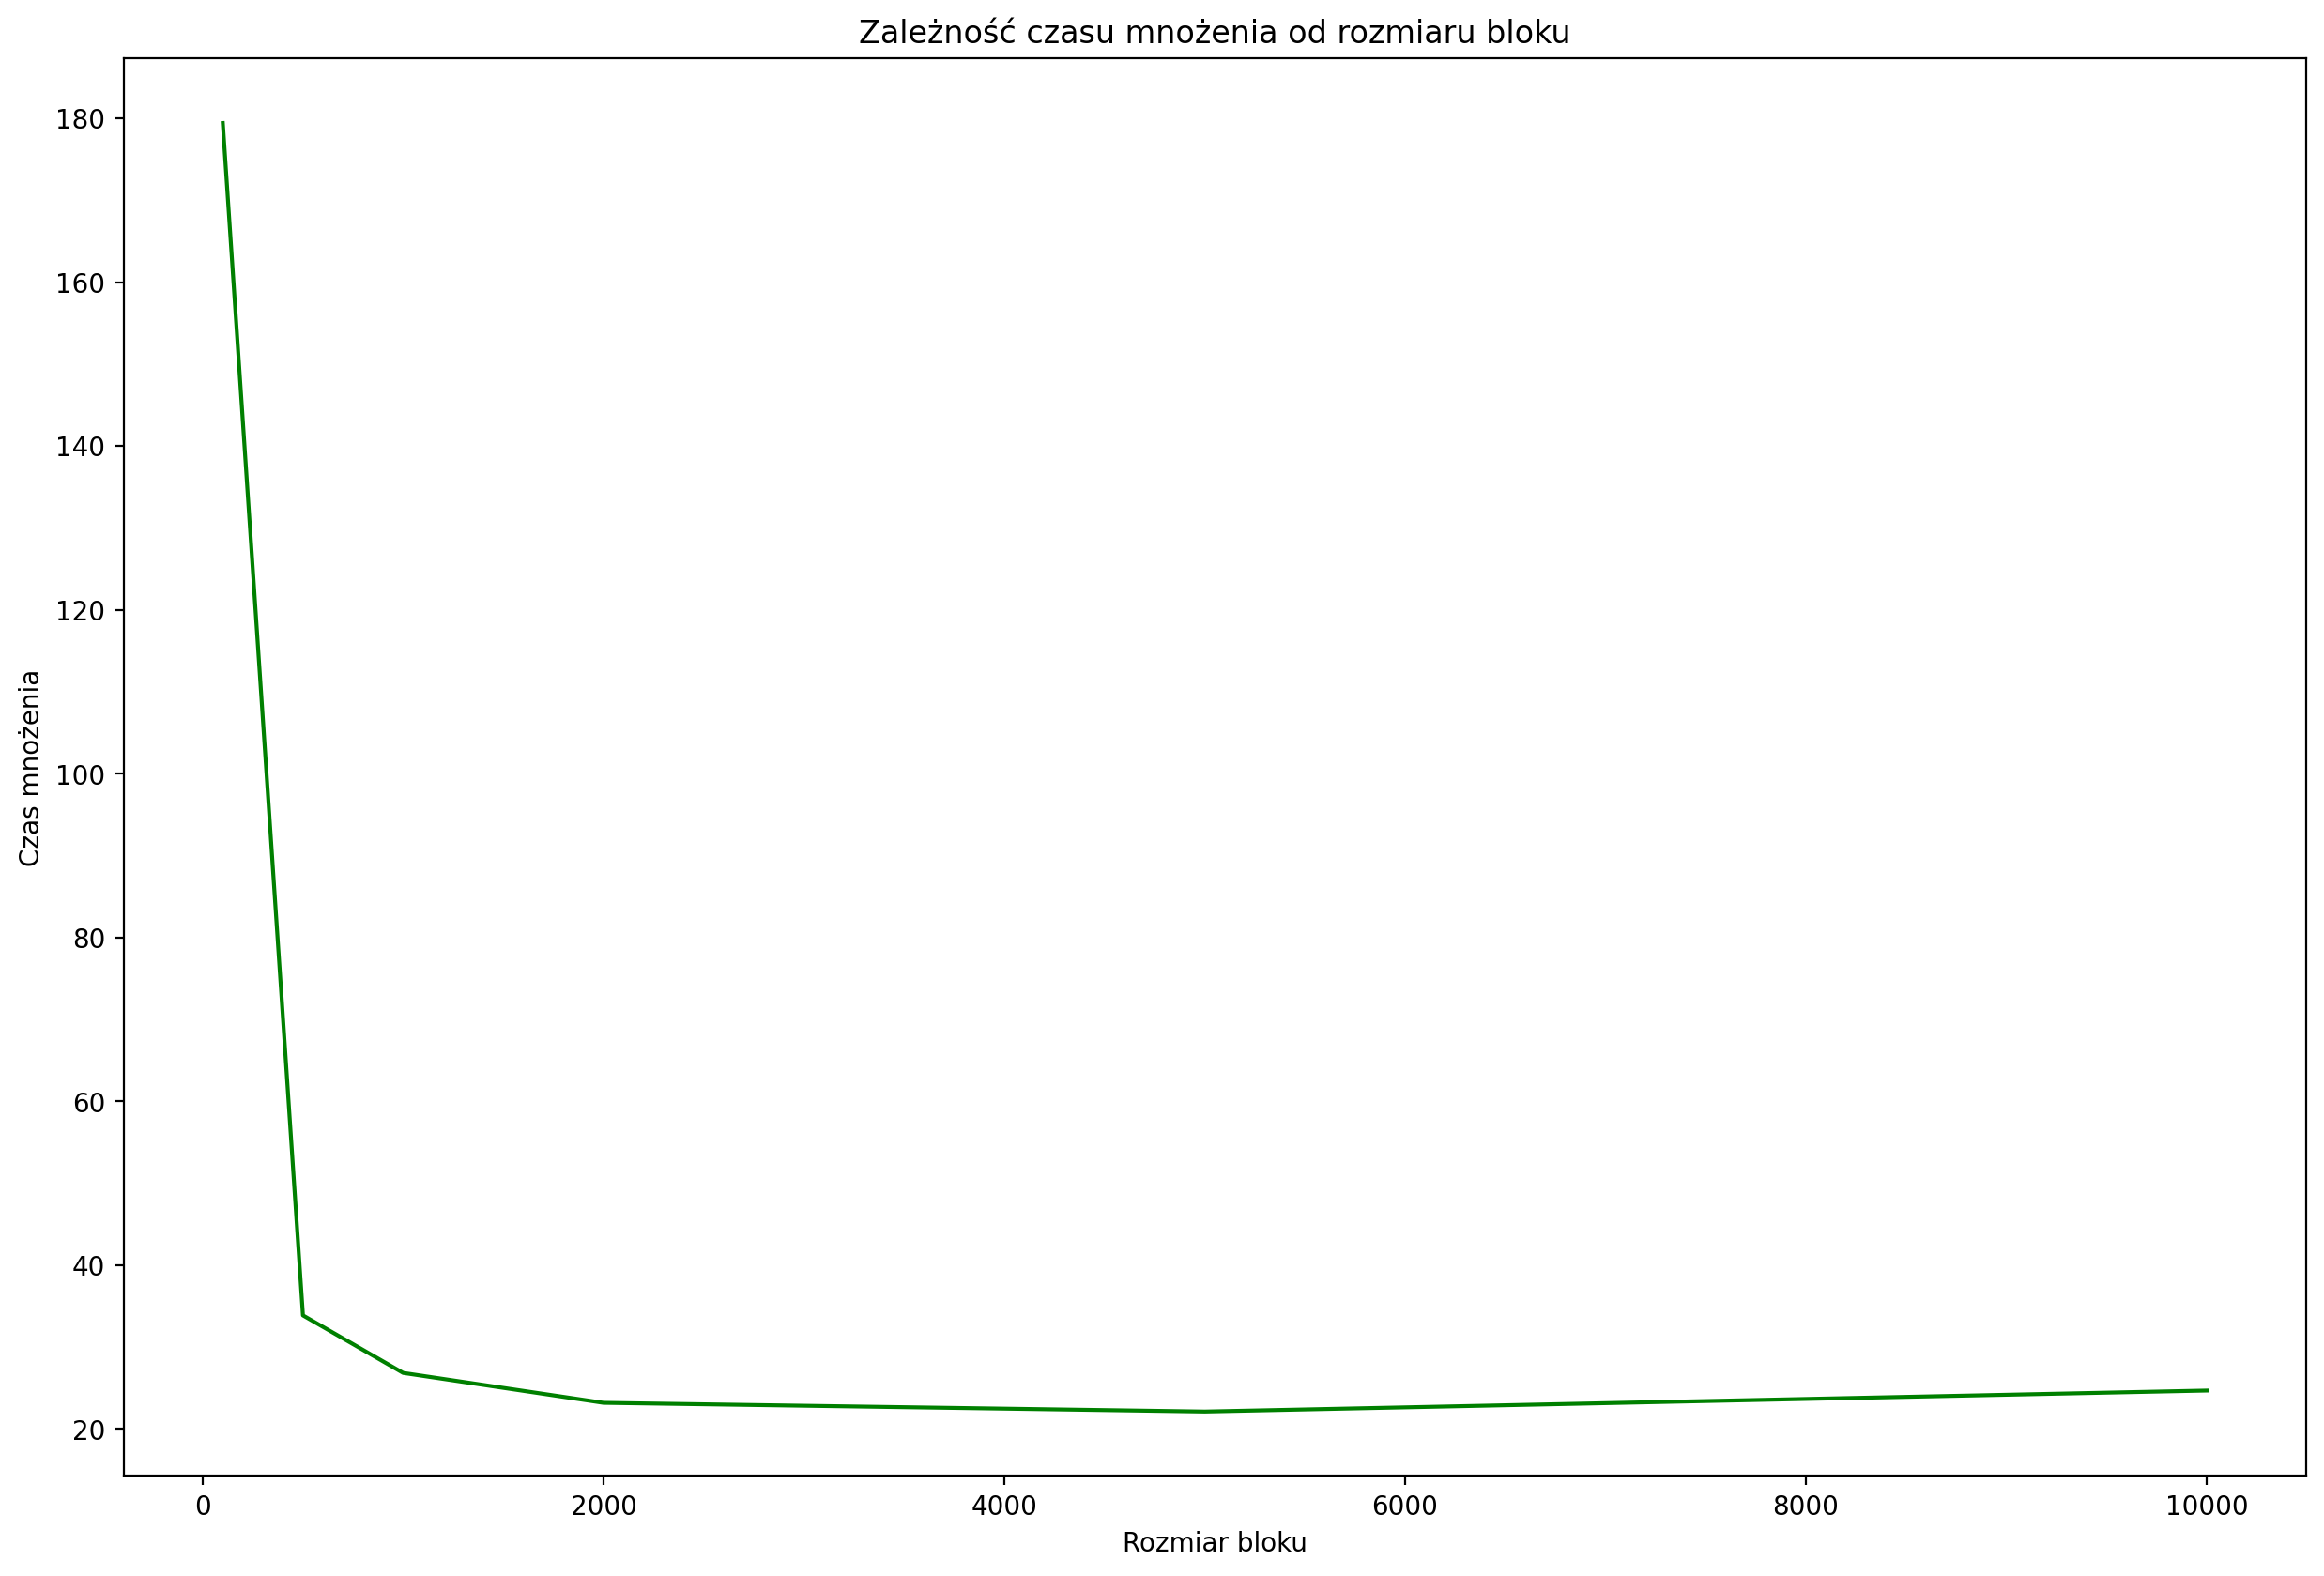

In [23]:
plt.plot(block_lengths3, time3, color = 'green')
plt.xlabel("Rozmiar bloku")
plt.ylabel("Czas mnożenia")
plt.title("Zależność czasu mnożenia od rozmiaru bloku")
plt.show()

Dla algorytmu blokowego z użyciem wbudowanego mnożenia, najbardziej optymalna wielkość bloku to 5000.